<a href="https://colab.research.google.com/github/jiwwnn/KDT/blob/main/Linear_Regression_230620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: Lecture_Note/머신러닝/회귀(Regression)/Regression_230323.ipynb

### Gradient Descent

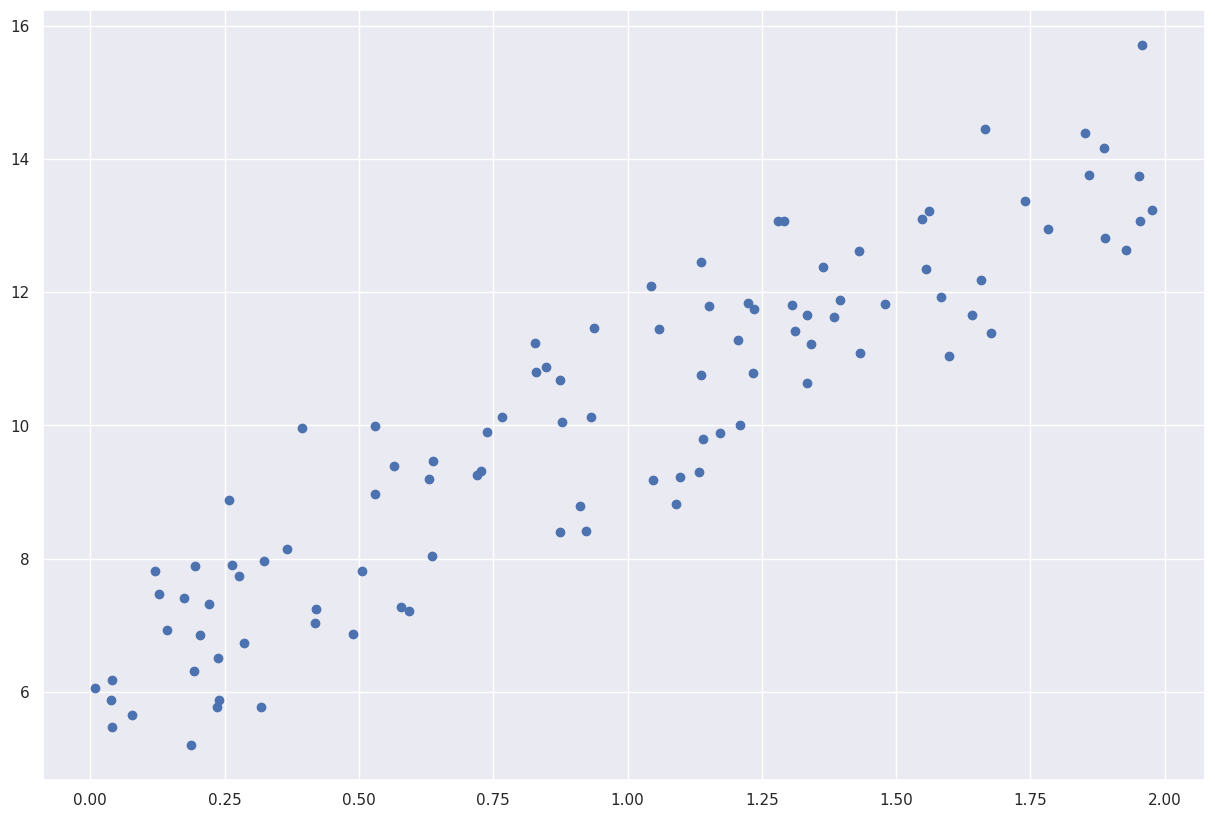

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6), random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100,1) # 0~1
y = 6 + 4 * X + np.random.randn(100,1) # 평균 0, 표준편차 1

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y) # y = w_0 + w_1 X_1 -> 벡터의 길이
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred # error function(실제값-예측값)

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1)) # 초기값 ones로 세팅 N 크기만큼 받아들이고,

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # error ftn : mse(mean square error)
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    # new = old - update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  print(cost)
  return cost

In [ ]:
w1, w0 = gradient_descent_steps(X, y, iters=1000) # 1000번을 반복
# 최적의 값을 뽑고 그때의 cost 값을 출력
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
0.9934784315632568
Gradient Descent Total Cost:0.9935


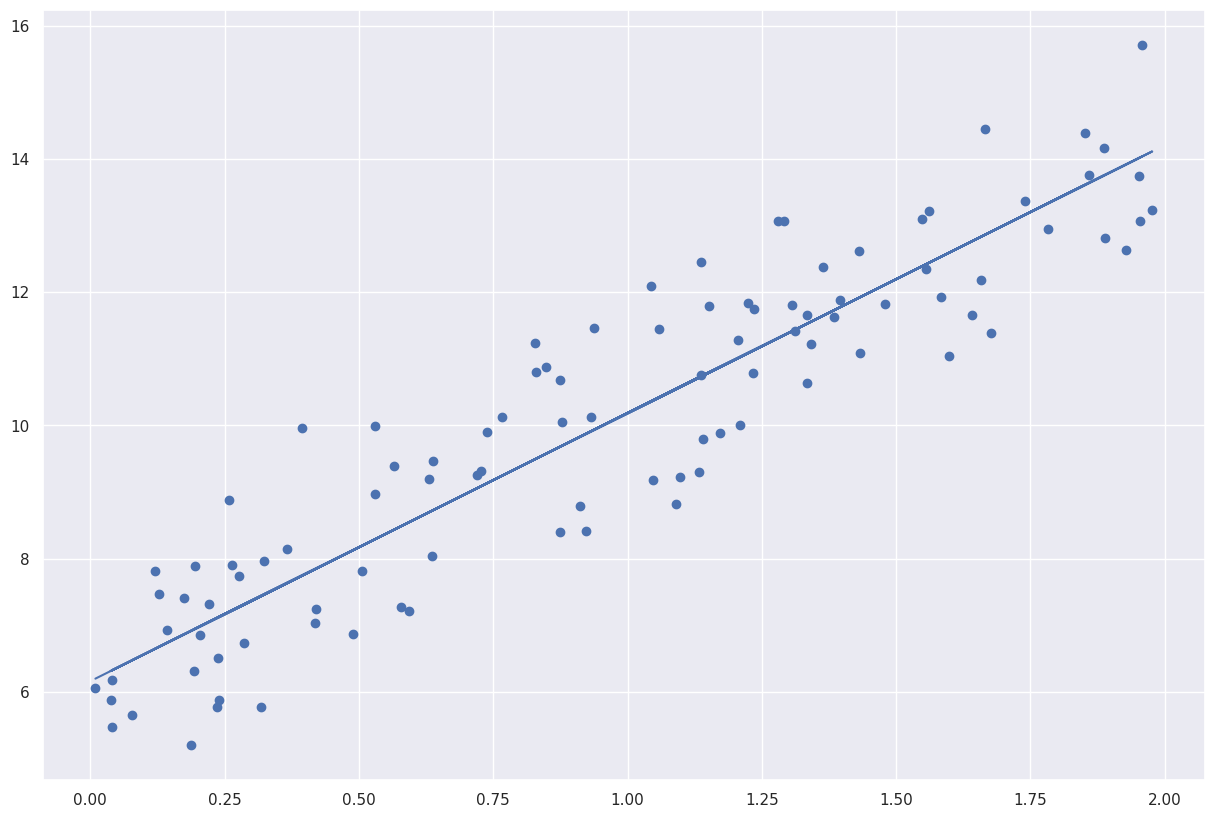

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### data가 적으면 gradient descent 방법을 사용할텐데, data가 굉장히 큼
-> 미분 자체가 계산량이 많아짐 / 변수가 많아서 미분이 많아짐

통계에서는 모집단(전체)->표본(sample) 통계량 혹은 결론


stochastic

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  for ind in range(iters):
    np.random.seed(ind) # ?
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출하여 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0]) # 배열 반환
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, wo_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('W1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

W1: 4.028 w0: 6.156
0.9937111256675345
Stochastic Gradient Descent Total Cost:0.9937


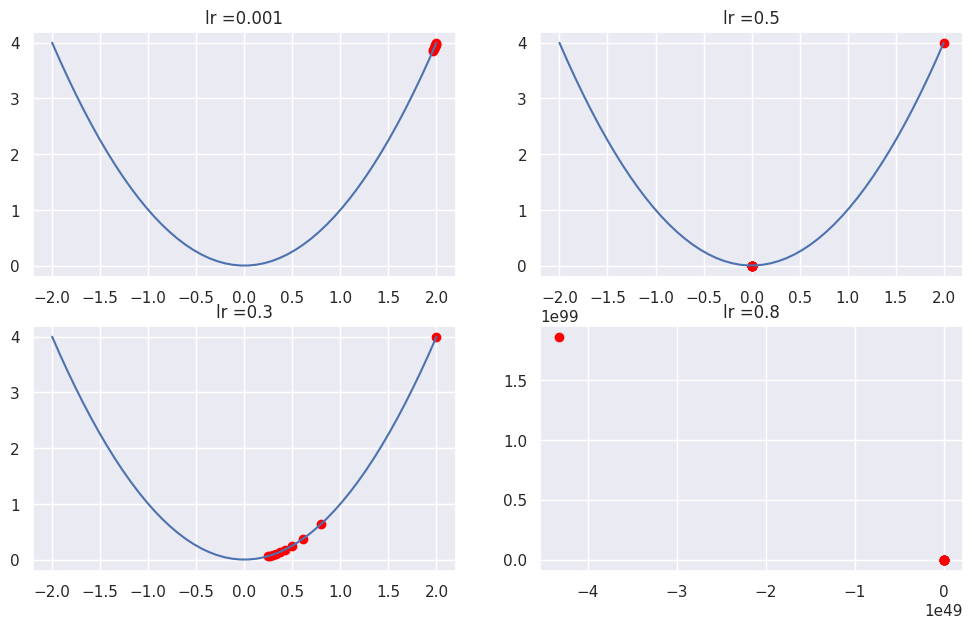

In [ ]:
# 보폭에 따른 결과를 보려고 함
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.5, 0.3, 0.8]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실함수를 y = x^2로 정의함

  for i in range(1, 10):
    # 먼저 해당 위치에서 미분값을 구함 (???)

    dev_value = w_old **2

    # 위의 값을 이용하여 가중치 없데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) # 업데이트된 가중치를 저장함
    y.append(w_old ** 2) # 업데이트 된 가중치의 손실값을 저장함

  return derivative, y

x = np.linspace(-2, 2, 50) # 구간 시작점, 구간 끝점, 구간 내 숫자 개수
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i, lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color='red')
  ax.plot(x, x_square)
  ax.title.set_text('lr ='+str(lr))

plt.show()

### Sklearn 데이터셋 활용
#### **Build-in dataset**
- load_boston: 보스톤 집값 데이터
- load_iris: 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digits: 손글씨 데이터
- load_linnerud: multi-output regression용 데이터
- load_wine: 와인 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터





### Sklearn Linear Regression Tutorial with Boston House Dataset
- Boston house dataset은 1.o부터 사라짐. 버전 downgrade가 필요

In [ ]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
boston = datasets.load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [ ]:
print(type(boston))
print('/n')
print(boston.keys())
print('/n')
print(boston.data.shape)
print('/n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>
/n
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
/n
(506, 13)
/n
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
bos = pd.DataFrame(boston.data, columns= boston.feature_names)
bos['PRICE'] = boston.target
print(bos.head)

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24

In [ ]:
bos.isnull().sum() # 결측치 확인

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
bos.describe() # 요약통계량

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


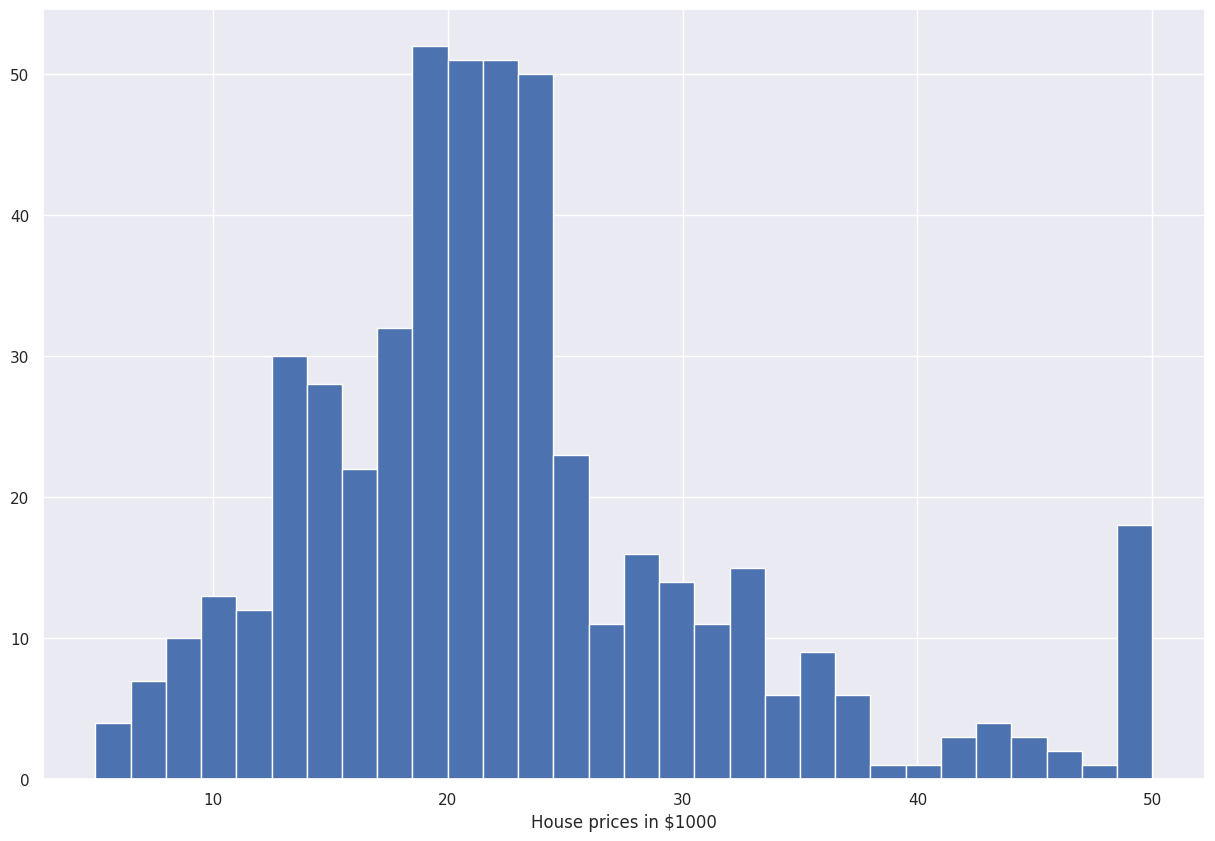

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 10)}) # Price에 대해 그림을 그림. figure.figsize : 크기를 어떻게 할꺼냐?
plt.hist(bos['PRICE'], bins=30) # .hist -> 히스토그램을 하겠다 .bins -> 막대가 몇개냐?
plt.xlabel('House prices in $1000') # x축
plt.show() # 그림을 그리시오

<Axes: >

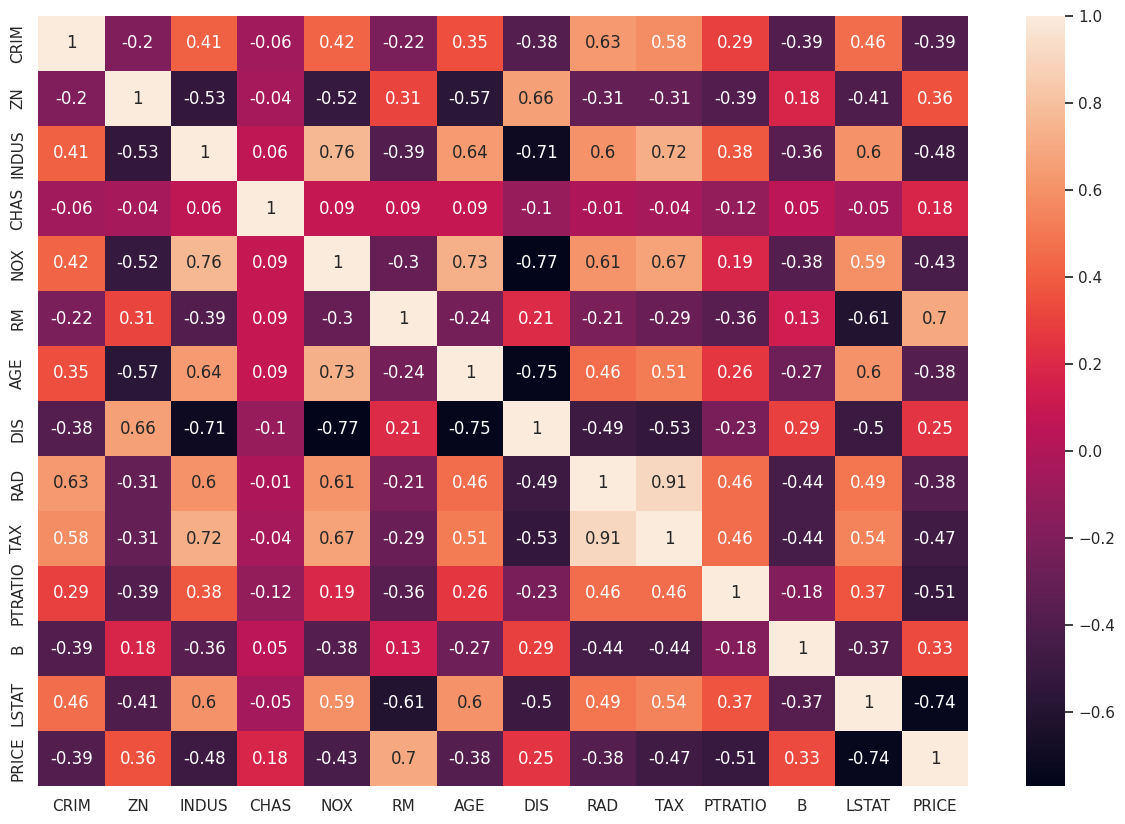

In [ ]:
correlation_matrix = bos.corr().round(2) # 상관계수를 계산해줘
sns.heatmap(data=correlation_matrix, annot=True) # 관계가 높다는 검은색, 밝은색 -> 진학 색깔이면 관계가 높다

# 다중공산성 문제를 확인한 것(왜냐하면 타겟은 빠져있기 때문에) #??

In [ ]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

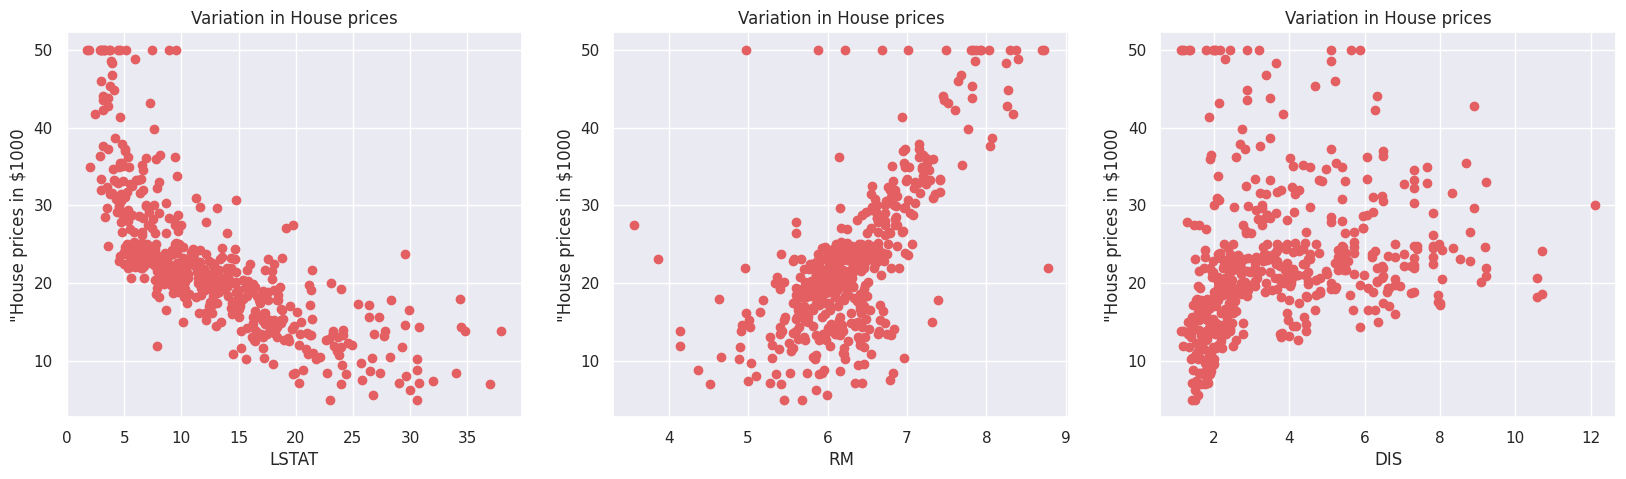

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM', 'DIS']
target = bos['PRICE']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = bos[col]
  y = target
  plt.scatter(x,y, marker='o', color='#e35f62')
  plt.title('Variation in House prices')
  plt.xlabel(col)
  plt.ylabel('"House prices in $1000')

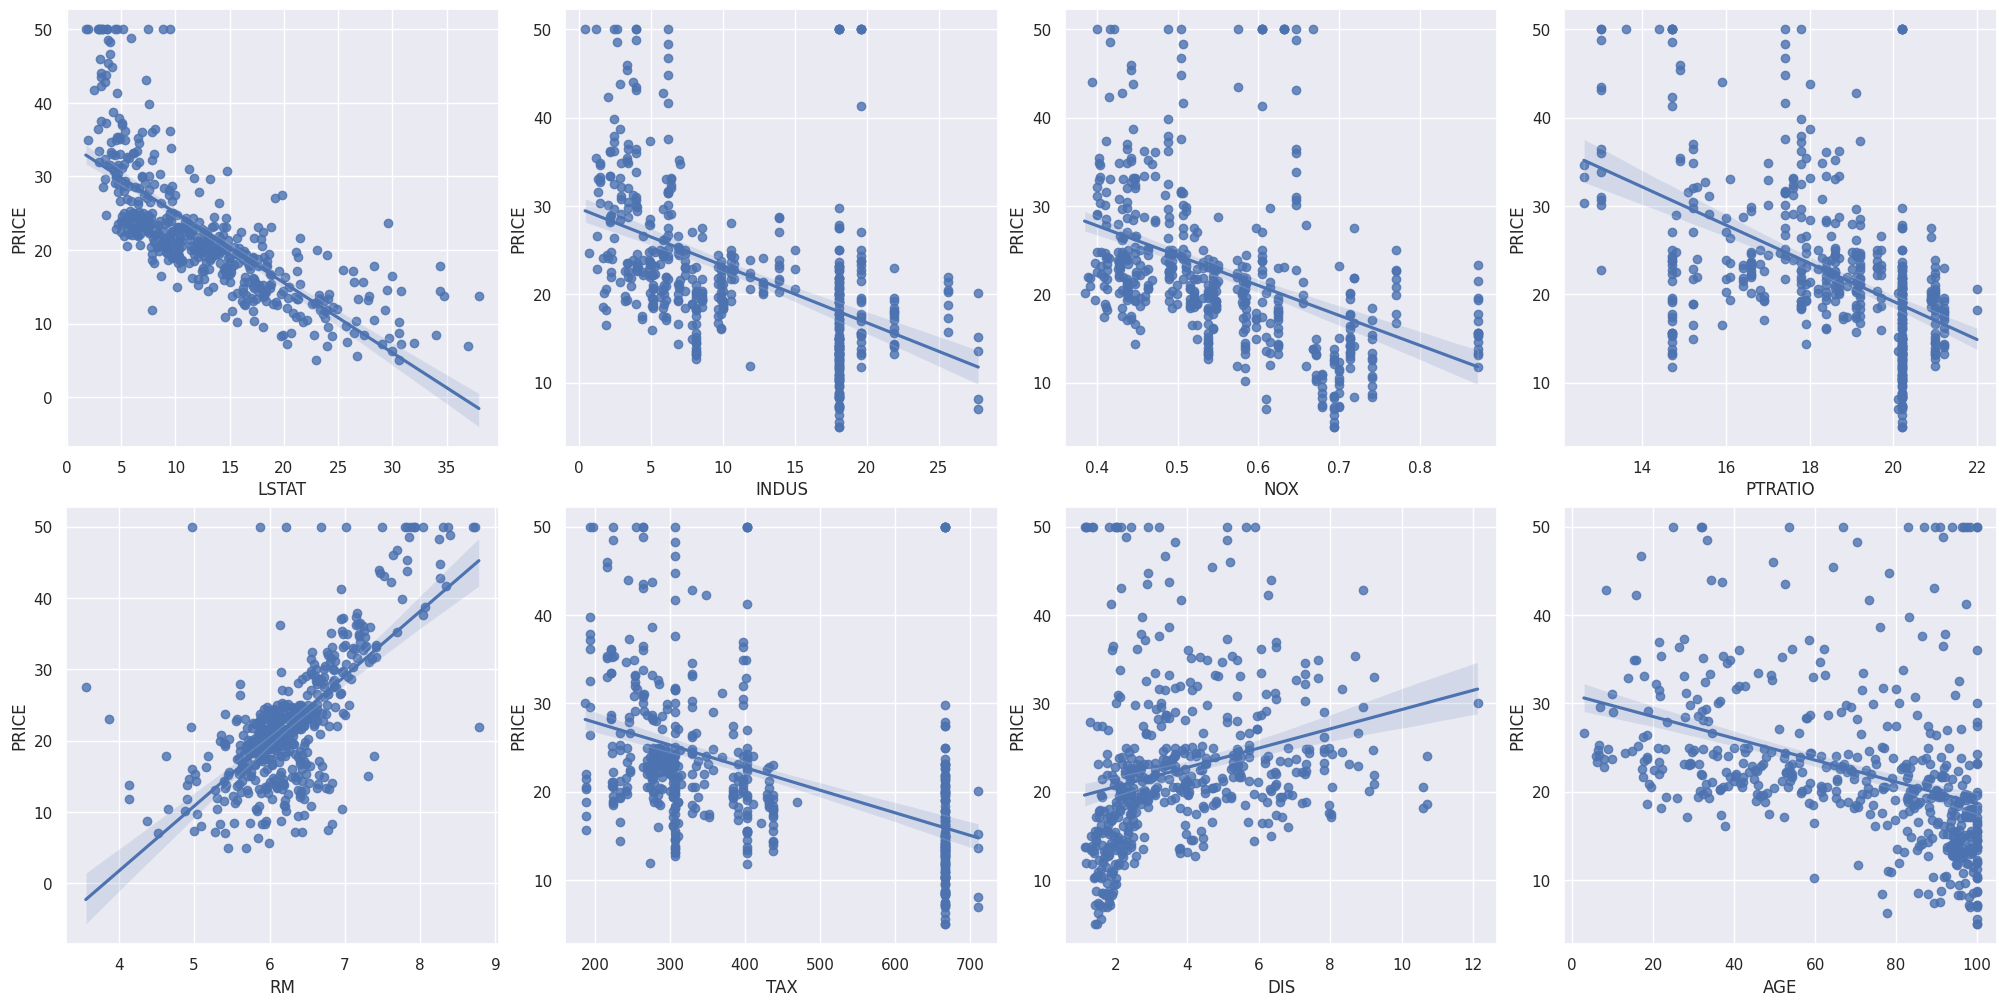

In [ ]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = bos.loc[:, column_sels] # 데이터프레임??
y = bos['PRICE']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

In [ ]:
print(x)
print(x['LSTAT'])

     LSTAT  INDUS    NOX  PTRATIO     RM    TAX     DIS   AGE
0     4.98   2.31  0.538     15.3  6.575  296.0  4.0900  65.2
1     9.14   7.07  0.469     17.8  6.421  242.0  4.9671  78.9
2     4.03   7.07  0.469     17.8  7.185  242.0  4.9671  61.1
3     2.94   2.18  0.458     18.7  6.998  222.0  6.0622  45.8
4     5.33   2.18  0.458     18.7  7.147  222.0  6.0622  54.2
..     ...    ...    ...      ...    ...    ...     ...   ...
501   9.67  11.93  0.573     21.0  6.593  273.0  2.4786  69.1
502   9.08  11.93  0.573     21.0  6.120  273.0  2.2875  76.7
503   5.64  11.93  0.573     21.0  6.976  273.0  2.1675  91.0
504   6.48  11.93  0.573     21.0  6.794  273.0  2.3889  89.3
505   7.88  11.93  0.573     21.0  6.030  273.0  2.5050  80.8

[506 rows x 8 columns]
0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64


In [ ]:
bos.RM.shape

(506,)

In [ ]:
bos.PRICE.shape

(506,)

In [ ]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1) # train_test_split 할 때 이 형태여야 하는지?
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_rooms, y_price, test_size=0.2, random_state=5) # Y??
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


###참고 : 선형 회귀분석의 4가지 기본가정
선형회귀의 가정은 4가지 정도가 있다.
1. 독립변수와 종속변수 간의 선형적인 관계를 가정한다.
2. 오차항은 정규분포를 따른다는 가정이다. (Normality)
3. 오차항은 등분산성을 가정한다. (Homoscedasticity)
4. 공분산성이 없다는 가정이다. (no multicollinearity)
모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.
-> 어처구니 없는 해석을 하게 만듦

- 피쳐 간의 상관관계까 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity)
- RMSE(Root Mean Squared Error): MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌움.

R^2 = 예측값 Variance / 실제값 Variance

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train에 대한 평가
reg_1 = LinearRegression()
reg_1.fit(X_train, Y_train)
# print(reg_1.score(X_train_1, Y_train_1)) # R^2 score #???

y_train_predict = reg_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = round(reg_1.score(X_train, Y_train), 2)

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse)) # 점수 어떤건지? 평가 기준?
print("R2 score is {}".format(r2)) # ``
print('\n')

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [ ]:
# model evaluate for test set

y_pred = reg_1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred))) # fit 한번만 하는 이유?
r2 = round(reg_1.score(X_test, Y_test), 2)

print("The model performance for test set")
print("----------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
----------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




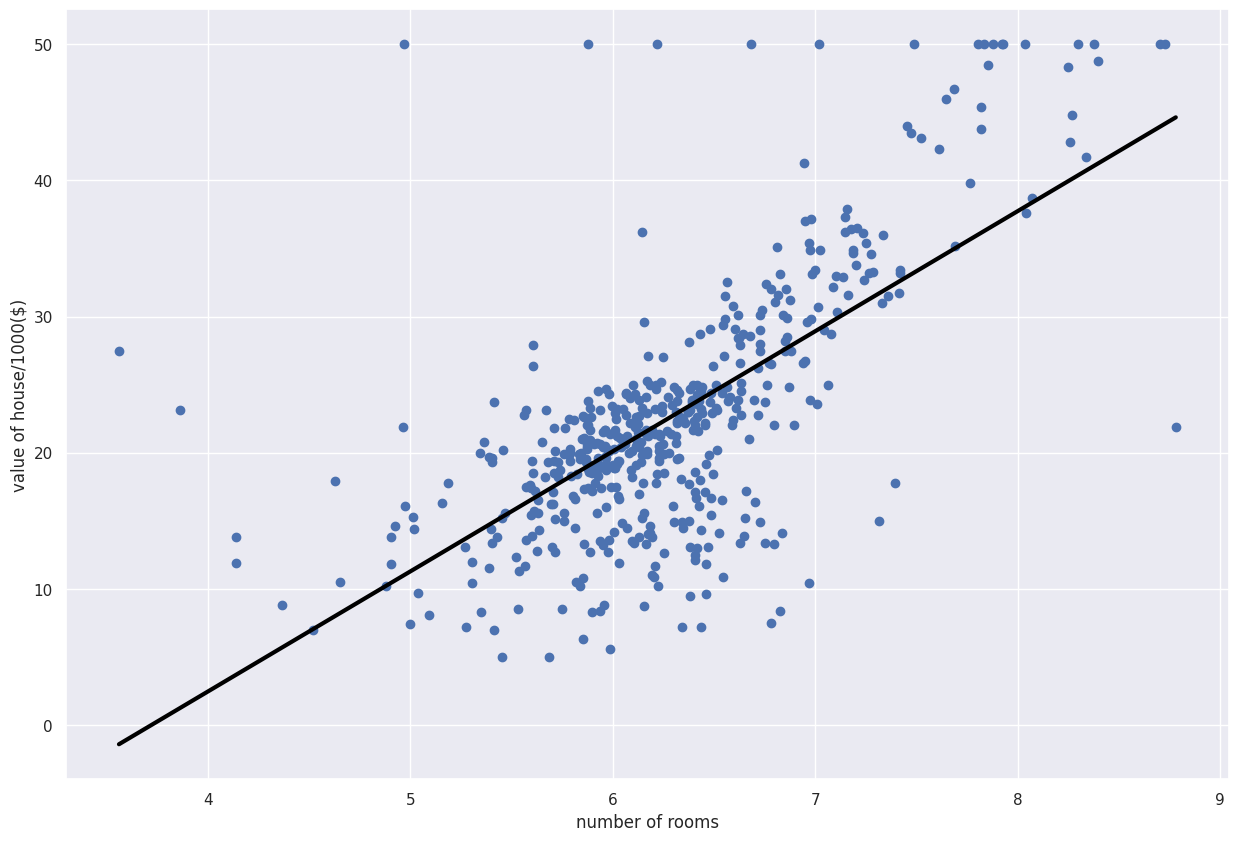

In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### Regression Model for All the variables

In [ ]:
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [ ]:
# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [ ]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665333
R^2: 0.67




In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

In [ ]:
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']
# 변수들에 상수항을 추가함
X_constant = sm.add_constant(X)

In [ ]:
#### 요약 통계량 OLS 방법 -> R^2을 이용해도 됨
# cf.최소자승법(OLS: Ordinary Least Squares)은 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법
model_1 = sm.OLS(y, X_constant)
lin_reg = model_1.fit()

In [ ]:
lin_reg.summary() # 이거 하면 위에 꺼 안해도 되는지?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        09:07:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측

In [18]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import sklearn
print(sklearn.__version__)

1.0.2


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 : (506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택가격(중앙값)

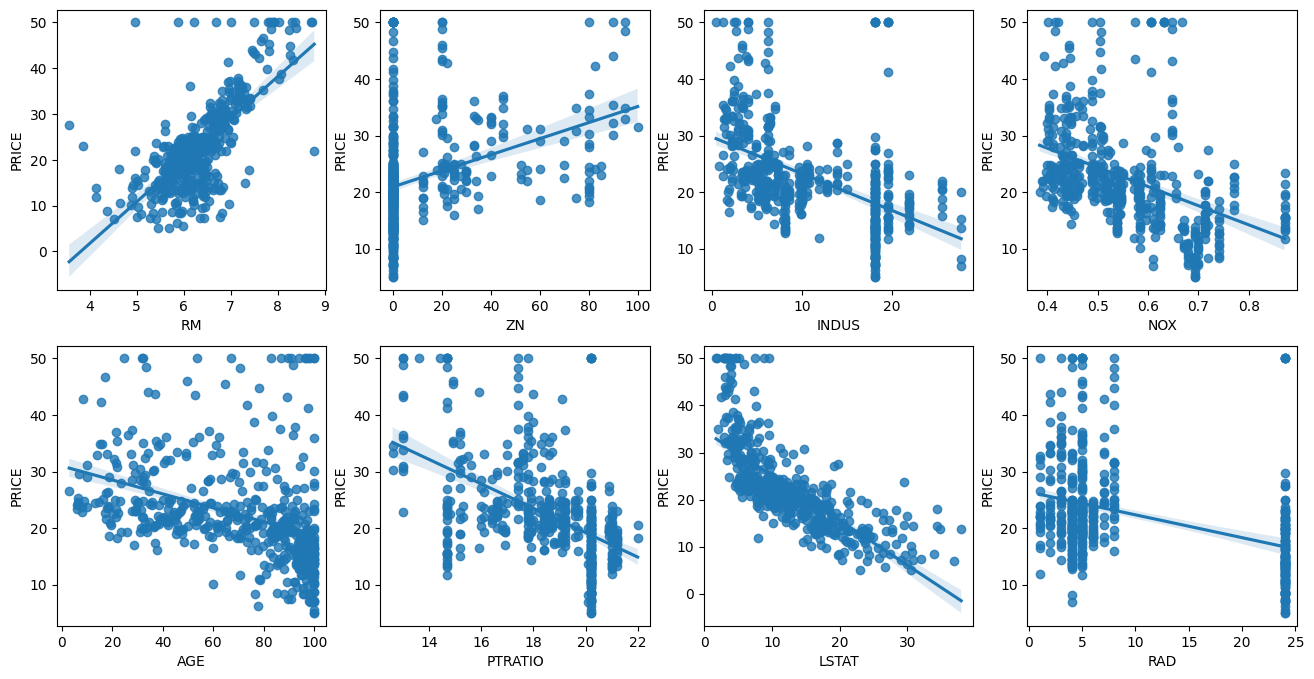

In [21]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

# Linear Regression OLS(Ordinary Least Squares(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행
lr= LinearRegression()
lr.fit(X_train, y_train) # model이 train을 하여라
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [23]:
print('절편 값:', lr.intercept_)
print(lr.coef_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164485
[-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [24]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명임에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation

K겹 교차 검증(Cross validation)이란 통계학에서 모델을 '평가'하는 한 가지 방법입니다. 소위 hold-out validation이라 불리는 전체 데이터의 일부를 validation set으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 데이터셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.

이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫번째 iteration에서는 BCDE를 트레이닝셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두번째 iteration에서는 ACDE를 트레닝셋으로, B를 테스트셋으로 하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. iteration이라는 상황에서만 테스트셋이 되는 것입니다.) 이때, 데이터를 몇 개로 쪼개느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

In [25]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5) # neg 하는 이유??
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 왜 음수로 코딩(02/19)?
# cross_val_score(scoring='neg_mean_squared_error')로 반환한 값은 모두 음수
# 회귀의 값은 작아지면 좋으니까 마이너스를 취하여 작아지는 게 좋음 (사람마다 다를 듯) ##??
print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


### Polynomial Regression과 오버피팅/언더피팅 이해

#### Polynomial Regression 이해
단항 피처 $[x_1, x_2]$를 degree=2, 즉 2차 다항피처로 변환한다면?

$(x_1+x_2)^2$의 식 전개에 대응되는 $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2]$의 다항 피처들로 변환
1차 단항 피처들의 값이 $[x_1, x_2]$=[0,1]일 경우
2차 다항 피처들의 $[1, x_1=0, x_2=1, x_1^2=0, x_1x_2=0, x_2^2=1]$형태인 [1,0,1,0,0,1]로 변환



In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2 인 2차 단항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환 # 변환 기준,과정??
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X) # fit만 하고 변환 안하면 안된다
#poly_ftr = poly.fit_transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [30]:
def polynomial_func(X):
  y = 1 + 2 * X + X ** 2 + X ** 3 # ??? 이 식 왜 이렇게?
  return y

X =  np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


- If you have features [a,b,c] the default polynomial features(in sklearn the degree is 2) should be [1,a,b,c,a^2,b^2,c^2,ab,bc,ca].

In [31]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y) # 다항식 결정값???
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', )

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
